In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import ELU, Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.initializers import GlorotUniform
from tensorflow.keras import regularizers

%tensorflow_version 2.x
import tensorflow as tf

import os
import datetime
import random

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
# import dataset from txt file

X = np.array(())

DataSetPath = '/content/gdrive/My Drive/bsc/Final/DataSet/ferdousi_norm.txt'

dataset = pd.read_csv(DataSetPath, na_values=" ", header=None)
temp = dataset.iloc[:, 0].values

X = np.append(X, temp)

In [4]:
print(X[:3])
print(X[-1])
print(X[-2])

['به نام خداوند جان و خرد' 'کزین برتر اندیشه برنگذرد'
 'خداوند نام و خداوند جای']
هر آنکس که دارد هش و رای و دین
که تخم سخن من پراگنده ام


In [5]:
print("The total count of masraas is " , len(X))

The total count of masraas is  99217


In [6]:
# Train on just a quarter of data
X = X[: int(len(X) / 4) ]

if len(X) % 2 == 1:
    X = X[:-1]

In [7]:
print("The total count of masraas is " , len(X))

The total count of masraas is  24804


In [8]:
verses = []
input_verses = []
output_verses = []

for i in range(len(X)):
    if i % 2 == 0:
        input_verses.append('<sos> ' + X[i] + ' <middle> ' + X[i + 1])
        output_verses.append(X[i] + ' <middle> ' + X[i + 1] + ' <eos>')
        verses.append('<sos> ' + X[i] + ' <middle> ' + X[i + 1] + ' <eos>')

In [9]:
print("The total number of verses is ", len(verses))

The total number of verses is  12402


In [10]:
# tokenize all data

tokenizer = Tokenizer(filters="")
tokenizer.fit_on_texts(verses)

TokenizedVerses = tokenizer.texts_to_sequences(verses)
tokenized_input = tokenizer.texts_to_sequences(input_verses)
tokenized_output = tokenizer.texts_to_sequences(output_verses)

In [11]:
word2index = tokenizer.word_index
index2word = tokenizer.index_word

In [12]:
# find max length for padding

max_len = 0

for i in TokenizedVerses:
    if len(i) > max_len:
        sen = []
        for t in i :
            sen.append(index2word[t])
        print(sen)
    max_len = max(max_len, len(i)) 

max_len -= 1
print("maximum length of sentences : ", max_len)


['<sos>', 'به', 'نام', 'خداوند', 'جان', 'و', 'خرد', '<middle>', 'کزین', 'برتر', 'اندیشه', 'برنگذرد', '<eos>']
['<sos>', 'خداوند', 'کیوان', 'و', 'گردان', 'سپهر', '<middle>', 'فروزنده', 'ماه', 'و', 'ناهید', 'و', 'مهر', '<eos>']
['<sos>', 'نیابد', 'بدو', 'نیز', 'اندیشه', 'راه', '<middle>', 'که', 'او', 'برتر', 'از', 'نام', 'و', 'از', 'جایگاه', '<eos>']
['<sos>', 'خرد', 'را', 'و', 'جان', 'را', 'همی', 'سنجد', 'اوی', '<middle>', 'در', 'اندیشه', 'سخته', 'کی', 'گنجد', 'اوی', '<eos>']
['<sos>', 'سه', 'پاس', 'تو', 'چشم', 'است', 'وگوش', 'و', 'زبان', '<middle>', 'کزین', 'سه', 'رسد', 'نیک', 'و', 'بد', 'بی', 'گمان', '<eos>']
['<sos>', 'نه', 'کند', 'آوری', 'گیرد', 'از', 'باج', 'و', 'گنج', '<middle>', 'نه', 'دل', 'تیره', 'دارد', 'ز', 'رزم', 'و', 'ز', 'رنج', '<eos>']
['<sos>', 'ز', 'گنج', 'و', 'ز', 'تخت', 'و', 'ز', 'در', 'و', 'گهر', '<middle>', 'ز', 'اسپ', 'و', 'سلیح', 'و', 'کلاه', 'و', 'کمر', '<eos>']
['<sos>', 'به', 'دیبا', 'و', 'دینار', 'و', 'در', 'و', 'درم', '<middle>', 'به', 'بوی', 'و', 'به', 'رنگ'

In [13]:
# do padding

input_seq = pad_sequences(tokenized_input, maxlen=max_len, padding='post')
output_seq = pad_sequences(tokenized_output, maxlen=max_len, padding='post')

In [14]:
# building model

def build_model(word_num, max_len, latent_size = 512, word_embedding_size = 256):
    model = Sequential() 

    model.add(Embedding(
        input_dim=word_num,
        output_dim = word_embedding_size,
        input_length=max_len,
    ))

    model.add(LSTM(LATENT_SIZE, return_sequences=True, kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dropout(0.2))
    model.add(LSTM(LATENT_SIZE, return_sequences=True, kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dropout(0.2))
    model.add(LSTM(LATENT_SIZE, return_sequences=True, kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dropout(0.2))

    model.add(Dense(512, kernel_initializer=GlorotUniform(), kernel_regularizer=regularizers.l2(0.001)))
    model.add(ELU())
    model.add(Dropout(0.2))
    model.add(Dense(512, kernel_initializer=GlorotUniform(), kernel_regularizer=regularizers.l2(0.001)))
    model.add(ELU())
    model.add(Dropout(0.2))
    # model.add(Dense(512, kernel_initializer=GlorotUniform(), kernel_regularizer=regularizers.l2(0.001)))
    # model.add(ELU())
    # model.add(Dropout(0.2))

    model.add(Dense(word_num, activation="softmax", kernel_regularizer=regularizers.l2(0.001)))

    model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

    
    return model


In [15]:
base_path = "/content/gdrive/My Drive/bsc/Final/LSTM/"
!ls "/content/gdrive/My Drive/bsc/Final/LSTM/"

acc.txt			     loss.txt
checkpoint		     model_plot.png
cp.ckpt.data-00000-of-00001  sample_sentences_during_training.txt
cp.ckpt.index


In [16]:
# sample from model

def sample_line(model, type = 0):
    sos = word2index['<sos>']
    eos = word2index['<eos>']
    middle = word2index['<middle>']
    
    _row = np.repeat(0, max_len)
    _row[0] = sos
    np_input = _row.reshape(1,max_len)

    output_sentence = []
    
    
    for i in range(1, max_len):
        o = model.predict(np_input)
        
        probs = np.array(o[0][i])
        probs[0] = 0
        if type == 0:
            probs /= probs.sum()
            idx = np.random.choice(len(probs), p=probs)
        
        elif type == 1:
            idx = np.argmax(probs)
        
        np_input[0, i] = idx
    
    sentence = np_input[0]

    for i in sentence:
        if i == sos:
            continue
        if i == eos:
            break
        if i == 0:
            continue
        if i == middle:
            output_sentence.append("    -   ")
        else:
            output_sentence.append(index2word[i])

    decoded_review = ' '.join(output_sentence)

    return decoded_review

In [17]:
# create custom callback
class MyCustomCallback(tf.keras.callbacks.Callback):
    def __init__(self, initial_epoch = 0):
        self.initial_epoch = initial_epoch

    def on_epoch_end(self, epoch, logs=None):
        print('Training: epoch {} ends at {}'.format(epoch + self.initial_epoch, datetime.datetime.now().time()))
        print('sample text via predict : ')
        sentence = sample_line(self.model, 0)
        print(sentence)
        
        _path = base_path + "sample_sentences_during_training.txt"
        file_object = open(_path, 'a+')
        file_object.write('\n Training: epoch {} ends at {} \n'.format(epoch + self.initial_epoch, datetime.datetime.now().time()))
        file_object.write('sample text via predict : \n')
        file_object.write(sentence)
        file_object.close()
  

In [18]:
# create custom callback to save loss and acc

class MyCustomCallbackLoss(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):    
        loss_path = base_path + "loss.txt"
        acc_path = base_path + "acc.txt"
        print("saving loss and acc")
        file_object = open(loss_path, 'a+')
        file_object.write('{}\n'.format(logs["loss"]))
        file_object.close()
        file_object = open(acc_path, 'a+')
        file_object.write('{}\n'.format(logs["sparse_categorical_accuracy"]))
        file_object.close()
  

In [ ]:
# train model

LATENT_SIZE = 512
EPOCH_TIME = 40
WORD_NUM = len(index2word) + 1
WORD_EMBEDDING_SIZE = 256

# Create a callback that saves the model's weights
checkpoint_path = base_path + "cp.ckpt" 
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, verbose=1, save_weights_only=True)

model = build_model(word_num = WORD_NUM, max_len = max_len, latent_size = LATENT_SIZE, word_embedding_size = WORD_EMBEDDING_SIZE)

model.fit(input_seq, output_seq, batch_size=100, epochs = EPOCH_TIME, validation_split= 0.2, shuffle=True, verbose=1,
          callbacks=[
                     cp_callback,
                     MyCustomCallback(),
                     MyCustomCallbackLoss()
                    ]
          )

In [ ]:
# train base on last checkpoint

LATENT_SIZE = 512
WORD_NUM = len(index2word) + 1
WORD_EMBEDDING_SIZE = 256
EPOCH_TIME = 40
PR_EPOCHS = 82

# Create a callback that saves the model's weights
checkpoint_path = base_path + "cp.ckpt" 
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, verbose=1)

model = build_model(word_num = WORD_NUM, max_len = max_len, latent_size = LATENT_SIZE, word_embedding_size = WORD_EMBEDDING_SIZE)
model.load_weights(checkpoint_path)
model.fit(input_seq, output_seq, batch_size=100, epochs = EPOCH_TIME, validation_split= 0.2, shuffle=True, verbose=1, 
          callbacks=[
                     cp_callback, 
                     MyCustomCallback(PR_EPOCHS),
                     MyCustomCallbackLoss()
                    ]
          )

In [19]:
# load model

LATENT_SIZE = 512
WORD_NUM = len(index2word) + 1
WORD_EMBEDDING_SIZE = 256


# Create a callback that saves the model's weights
checkpoint_path = base_path + "cp.ckpt" 
checkpoint_dir = os.path.dirname(checkpoint_path)

model = build_model(word_num = WORD_NUM, max_len = max_len, latent_size = LATENT_SIZE, word_embedding_size = WORD_EMBEDDING_SIZE)
model.load_weights(checkpoint_path)


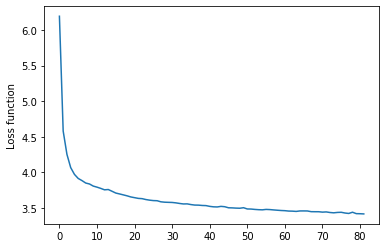

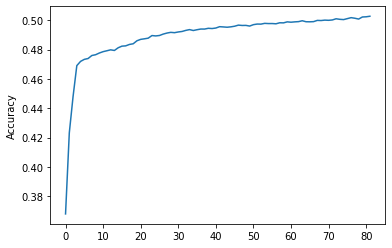

In [ ]:
# plot loss and acc
loss = pd.read_csv(base_path + "loss.txt", header=None)
loss = loss.iloc[:,0].values
acc = pd.read_csv(base_path + "acc.txt", header=None)
acc = acc.iloc[:,0].values

plt.plot(loss)
plt.ylabel("Loss function")
plt.show()

plt.plot(acc)
plt.ylabel("Accuracy")
plt.show()

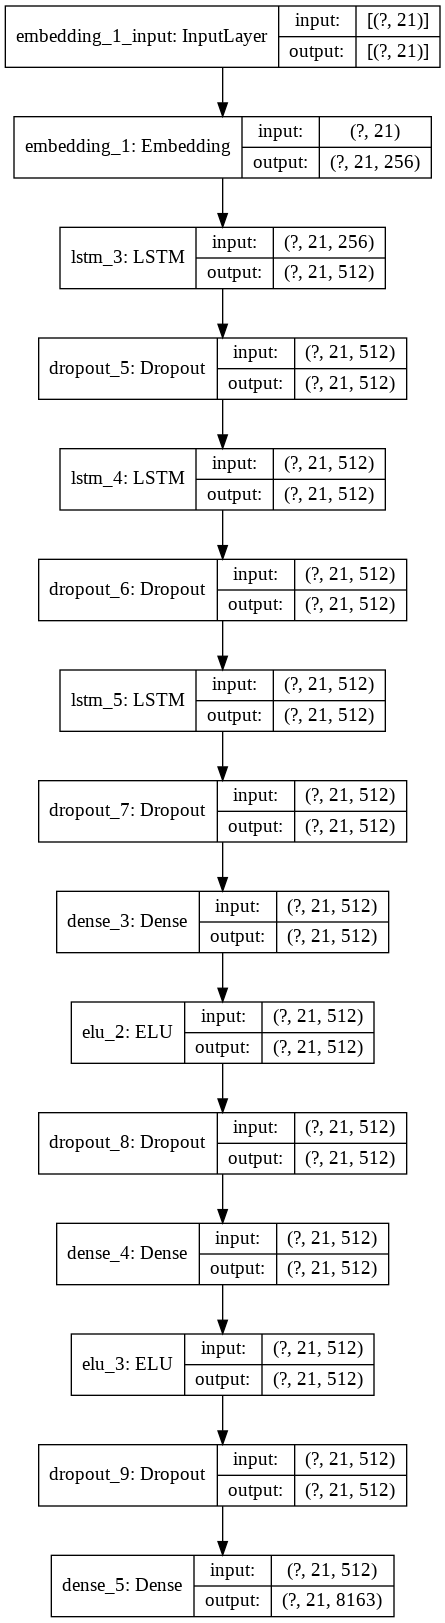

In [ ]:
# showing model graph
from tensorflow.keras.utils import plot_model
plot_model(model, to_file= base_path + 'model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# sample from model

def generate_sample_line(type = 0):
    sos = word2index['<sos>']
    eos = word2index['<eos>']
    middle = word2index['<middle>']
    
    _row = np.repeat(0, max_len)
    _row[0] = sos
    np_input = _row.reshape(1,max_len)

    output_sentence = []
    
    for t in range(2):
        for i in range(1, max_len):
            o = model.predict(np_input)
        
            probs = np.array(o[0][i])
            probs[0] = 0
            if type == 0:
                probs /= probs.sum()
                idx = np.random.choice(len(probs), p=probs)
        
            elif type == 1:
                idx = np.argmax(probs)
        
            np_input[0, i] = idx
    
    sentence = np_input[0]

    for i in sentence:
        if i == sos:
            continue
        if i == eos:
             break
        if i == 0:
            continue
        if i == middle:
            output_sentence.append("    -   ")
        else:
            output_sentence.append(index2word[i])

    decoded_review = ' '.join(output_sentence)

    return decoded_review

In [ ]:
print(generate_sample_line(1))

In [ ]:
# text imputing
index = np.random.randint(0, int(len(X) / 4)) 
if index % 2 == 1:
    index -= 1
verse_text = []
verse_text.append(X[index] + " <middle> " + X[index + 1] + " <eos>")
# print(verse_text)
verse_text = tokenizer.texts_to_sequences(verse_text)
verse_text_seq = pad_sequences(verse_text, maxlen=max_len, padding='post')
# print(verse_text_seq)

def print_sent_from_seq(seq):
    output_sen = []
    for i in seq:
        if i == word2index["<eos>"]:
            break
        if i == 0:
            continue
        if i == word2index["<middle>"]:
            output_sen.append("    -   ")
        elif i == -1:
            output_sen.append("?")
        else:
            output_sen.append(index2word[i])

    decoded_review = ' '.join(output_sen)
    print(decoded_review)

# remove k word at random

k = 2
index_array = []

print("real sentence : ")
print_sent_from_seq(verse_text_seq[0])

for i in range(k):
    index = np.random.randint(0, max_len)
    while verse_text_seq[0][index] == word2index["<middle>"] or verse_text_seq[0][index] == word2index["<eos>"] or verse_text_seq[0][index] == 0:
         index = np.random.randint(0, max_len)
    index_array.append(index)
    verse_text_seq[0][index] = 0

print("After removing some words : ")
verse_text_seq_temp = verse_text_seq[0].copy()
for i in index_array:
    verse_text_seq_temp[i] = -1
print_sent_from_seq(verse_text_seq_temp)

for i in index_array:
    y_hat = model.predict(verse_text_seq)
    probs = np.exp(y_hat[0][i])
    probs[0] = 0

    idx = 0
    probs /= probs.sum()
    idx = np.random.choice(len(probs), p=probs)

    verse_text_seq[0][i] = idx

print("After text imputing : ")
print_sent_from_seq(verse_text_seq[0])



In [ ]:
# complete the verse task
index = np.random.randint(0, int(len(X) / 4)) 
if index % 2 == 1:
    index -= 1
verse_text = []
verse_text.append(X[index] + " <middle> " + X[index + 1] + " <eos>")

verse_text = tokenizer.texts_to_sequences(verse_text)
verse_text_seq = pad_sequences(verse_text, maxlen=max_len, padding='post')

print("real sentence : ")
print_sent_from_seq(verse_text_seq[0])

middle = 0
for i in range(len(verse_text_seq[0]) - 1, 0, -1):
    if verse_text_seq[0][i] == word2index["<middle>"]:
        middle = i
        break
    verse_text_seq[0][i] = 0

for i in range(middle + 1, max_len):
    y_hat = model.predict(verse_text_seq)
    probs = np.exp(y_hat[0][i])
    probs[0] = 0

    idx = 0
    probs /= probs.sum()
    idx = np.random.choice(len(probs), p=probs)

    verse_text_seq[0][i] = idx

print("After completing the verse : ")
print_sent_from_seq(verse_text_seq[0])

